# Biodiversity in National Parks

speicies_info.csv and observations.csv, provided by Codecademy.com, are files to be analysed in this project. By analysing, the species in different national parks will be investigated so that the biodiversity will be evaluated. 

Here are a few questions that this project has sought to answer:

    What is the distribution of conservation status for species?
    Are certain types of species more likely to be endangered?
    Are the differences between species and their conservation status significant?
    Which animal is most prevalent and what is their distribution amongst parks?

### Needed libraries and data to be analysed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the datasets
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')


### Data cleaning

In [4]:
# Explore species dataset
species.head()
species.info()
species.describe()
species.shape

# Check for missing values
species.isnull().sum()

# Explore observations dataset
observations.head()
observations.info()
observations.shape

# Check unique values
print(species['category'].unique())
print(species['conservation_status'].unique())
print(observations['park_name'].unique())

# Fill missing conservation_status with 'No Intervention'
species['conservation_status'] = species['conservation_status'].fillna('No Intervention')


# Check for duplicates
species.duplicated().sum()
observations.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
['No Intervention' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']
['Grea

np.int64(15)

### Exploratory data analysis

conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64


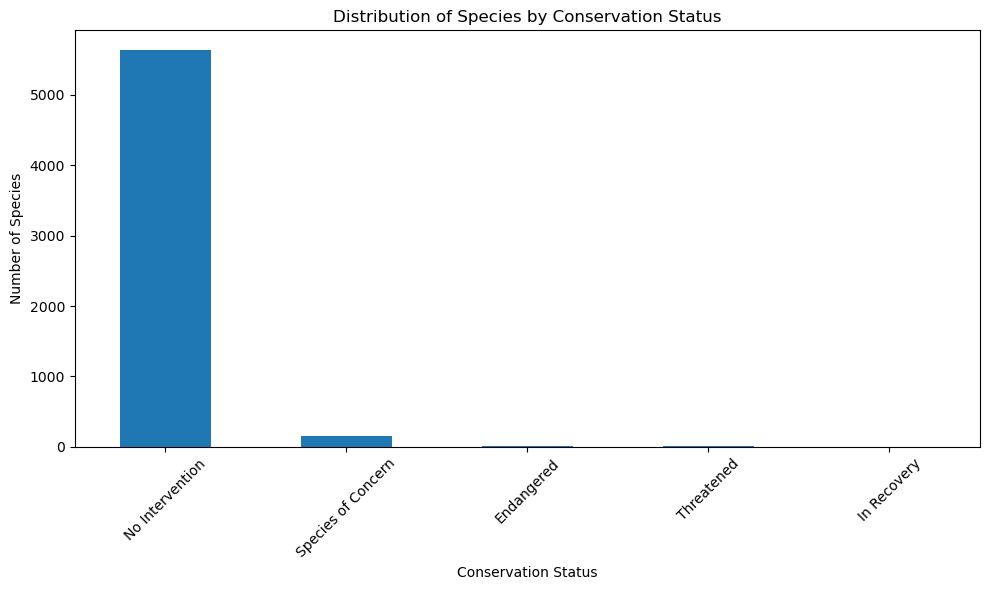

In [5]:
# Count species by conservation status
status_counts = species['conservation_status'].value_counts()
print(status_counts)

# Visualize
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar')
plt.title('Distribution of Species by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64


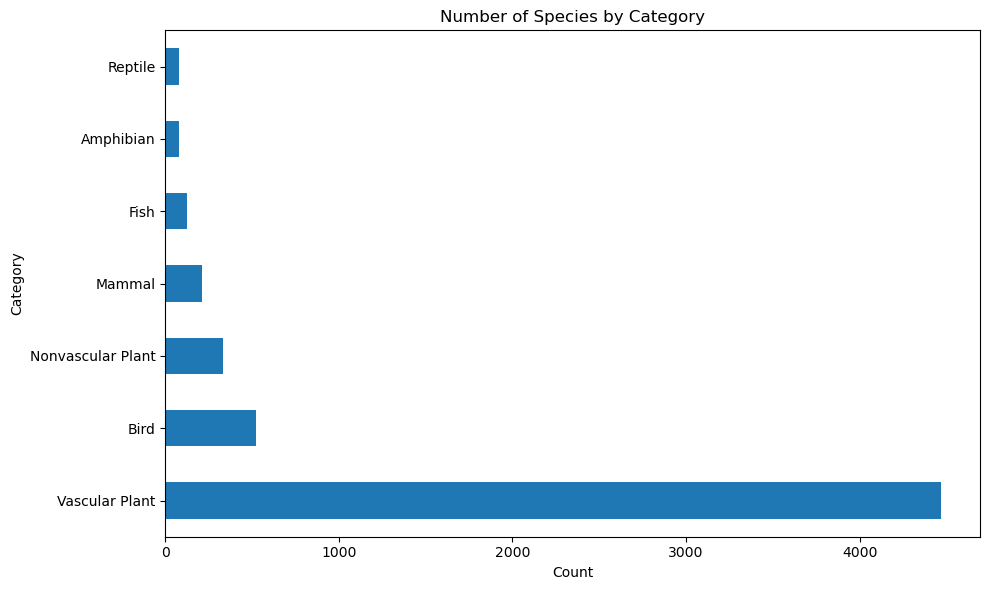

In [6]:
# Count by category
category_counts = species['category'].value_counts()
print(category_counts)

# Visualize
plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh')
plt.title('Number of Species by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                   1     4     3       7                  0   
In Recovery                  0     3     0       1                  0   
No Intervention             73   442   116     176                328   
Species of Concern           4    72     4      28                  5   
Threatened                   2     0     4       2                  0   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered                 0               1  
In Recovery                0               0  
No Intervention           74            4424  
Species of Concern         5              43  
Threatened                 0               2  


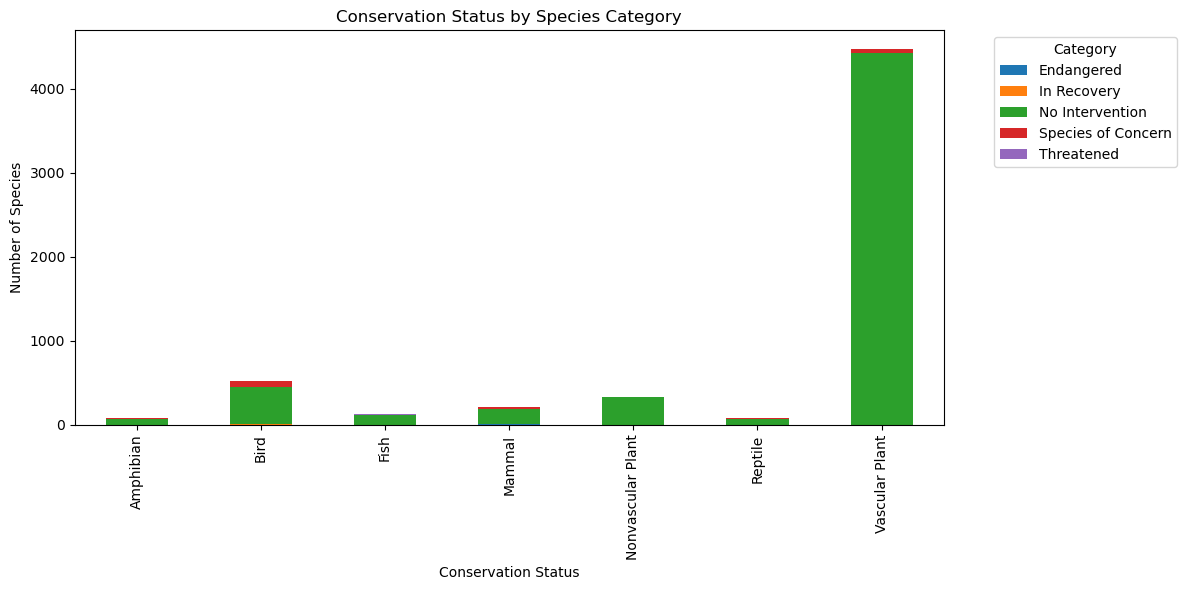

In [7]:
# Create crosstab
category_status = pd.crosstab(species['conservation_status'], 
                               species['category'])
print(category_status)

# Stacked bar chart
category_status.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Conservation Status by Species Category')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


### Statistical analysis

In [8]:
# Create binary variable: protected vs not protected
species['is_protected'] = species['conservation_status'] != 'No Intervention'

# Chi-square test for each category
from scipy.stats import chi2_contingency

for category in species['category'].unique():
    category_data = species[['category', 'is_protected']].copy()
    category_data['is_category'] = category_data['category'] == category
    
    contingency = pd.crosstab(category_data['is_category'], 
                              category_data['is_protected'])
    chi2, pval, dof, expected = chi2_contingency(contingency)
    
    print(f"\n{category}:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"P-value: {pval:.4f}")
    if pval < 0.05:
        print("Significantly different from other categories!")



Mammal:
Chi-square statistic: 142.1005
P-value: 0.0000
Significantly different from other categories!

Bird:
Chi-square statistic: 250.6463
P-value: 0.0000
Significantly different from other categories!

Reptile:
Chi-square statistic: 1.4746
P-value: 0.2246

Amphibian:
Chi-square statistic: 6.0040
P-value: 0.0143
Significantly different from other categories!

Fish:
Chi-square statistic: 10.1844
P-value: 0.0014
Significantly different from other categories!

Vascular Plant:
Chi-square statistic: 303.9419
P-value: 0.0000
Significantly different from other categories!

Nonvascular Plant:
Chi-square statistic: 2.9507
P-value: 0.0858


### Merge and analyze Observations

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


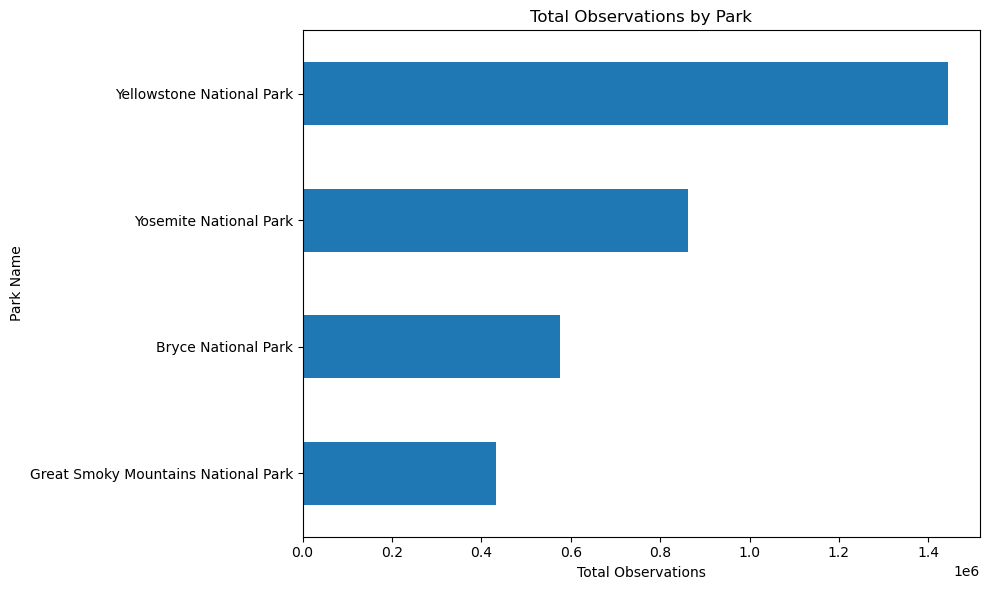

In [9]:
# Merge datasets
merged_df = observations.merge(species, on='scientific_name', how='left')

# Total observations by park
park_totals = observations.groupby('park_name')['observations'].sum()
print(park_totals)

# Visualize
plt.figure(figsize=(10, 6))
park_totals.sort_values().plot(kind='barh')
plt.title('Total Observations by Park')
plt.xlabel('Total Observations')
plt.ylabel('Park Name')
plt.tight_layout()
plt.show()


##### Which parks have the most endangered species observations?

In [10]:
endangered = merged_df[merged_df['conservation_status'].isin(['Endangered', 'Threatened', 'Species of Concern'])]
endangered_by_park = endangered.groupby('park_name')['observations'].sum().sort_values(ascending=False)
print(endangered_by_park)


park_name
Yellowstone National Park              43694
Yosemite National Park                 26331
Bryce National Park                    18221
Great Smoky Mountains National Park    12568
Name: observations, dtype: int64


##### What percentage of each category is protected?

In [11]:
protection_by_category = species.groupby('category')['is_protected'].agg(['sum', 'count'])
protection_by_category['percentage'] = (protection_by_category['sum'] / protection_by_category['count'] * 100).round(2)
print(protection_by_category.sort_values('percentage', ascending=False))


                   sum  count  percentage
category                                 
Mammal              38    214       17.76
Bird                79    521       15.16
Amphibian            7     80        8.75
Fish                11    127        8.66
Reptile              5     79        6.33
Nonvascular Plant    5    333        1.50
Vascular Plant      46   4470        1.03


##### Most commonly observed endangered species?

In [12]:
endangered_obs = merged_df[merged_df['conservation_status'] == 'Endangered']
top_endangered = endangered_obs.groupby(['common_names', 'category'])['observations'].sum().sort_values(ascending=False).head(10)
print(top_endangered)


common_names                                                 category      
Gray Wolf, Wolf                                              Mammal            715
Gray Wolf                                                    Mammal            715
Duskytail Darter                                             Fish              166
Mountain Avens, Spreading Avens                              Vascular Plant    162
Gray Myotis                                                  Mammal            160
California Condor                                            Bird              156
Sierra Nevada Bighorn Sheep                                  Mammal            153
Carolina Northern Flying Squirrel, Northern Flying Squirrel  Mammal            153
Red-Cockaded Woodpecker                                      Bird              146
June Sucker                                                  Fish              146
Name: observations, dtype: int64


### Summary report

In [13]:
# Create summary statistics
print("=" * 50)
print("BIODIVERSITY IN NATIONAL PARKS - SUMMARY REPORT")
print("=" * 50)
print(f"\nTotal number of species: {species.shape[0]}")
print(f"Total observations recorded: {observations['observations'].sum():,}")
print(f"\nSpecies by category:")
print(species['category'].value_counts())
print(f"\nConservation status breakdown:")
print(species['conservation_status'].value_counts())
print(f"\nNumber of protected species: {species['is_protected'].sum()}")
print(f"Percentage protected: {(species['is_protected'].sum()/len(species)*100):.2f}%")


BIODIVERSITY IN NATIONAL PARKS - SUMMARY REPORT

Total number of species: 5824
Total observations recorded: 3,314,739

Species by category:
category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

Conservation status breakdown:
conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

Number of protected species: 191
Percentage protected: 3.28%
